# House Price Prediction

### Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Load Train Dataset

In [2]:
dataset = pd.read_csv(r"E:\DEEP LEARNING\Projects\House Price Predictions\train.csv")
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Load Test Dataset

In [3]:
test_data = pd.read_csv(r"E:\DEEP LEARNING\Projects\House Price Predictions\test.csv")
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
test_data.shape

(1459, 80)

### Handling not available data

In [5]:
#Returns columns having NaN values
dataset.columns[dataset.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [6]:
#obtain count of NaN
dataset[dataset.columns[dataset.isnull().any()]].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

#### LotFrontage is to be filled with mean
#### Alley ,  BsmtQual , BsmtCond , BsmtExposure , BsmtFinType1 , BsmtFinType2 , FireplaceQu ,  GarageType , GarageYrBlt , GarageFinish ,  GarageQual , GarageCond , PoolQC , Fence are to be filled with 'Not Available'

#### Drop 'MasVnrType' ,  'MasVnrArea' , 'MiscFeature' , 'Electrical'  value columns
 

### Assign Predictors and Targets

In [7]:
X = dataset.drop(labels = ['SalePrice', 'Id'], axis = 1)
y = dataset['SalePrice']

In [8]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

### Handle Missing Data on train dataset

In [9]:
X['LotFrontage'].fillna(value = X['LotFrontage'].mean(), inplace=True)
X['BsmtQual'].fillna(value = 'Not Available', inplace=True)
X['BsmtCond'].fillna(value = 'Not Available', inplace=True)
X['BsmtExposure'].fillna(value = 'Not Available', inplace=True)
X['BsmtFinType1'].fillna(value = 'Not Available', inplace=True)
X['BsmtFinType2'].fillna(value = 'Not Available', inplace=True)
X['GarageType'].fillna(value = 'Not Available', inplace=True)
X['GarageYrBlt'].fillna(value = 'Not Available', inplace=True)
X['GarageFinish'].fillna(value = 'Not Available', inplace=True)
X['GarageQual'].fillna(value = 'Not Available', inplace=True)
X['GarageCond'].fillna(value = 'Not Available', inplace=True)
X['PoolQC'].fillna(value = 'Not Available', inplace=True)

In [10]:
X[X.columns[X.isnull().any()]].isnull().sum()

Alley          1369
MasVnrType        8
MasVnrArea        8
Electrical        1
FireplaceQu     690
Fence          1179
MiscFeature    1406
dtype: int64

#### Drop MSSubclass, LotFrontage, LotArea,  Alley, LotShape, LandContour, LotConfig, Condition1, Condition2, 'RoofStyle' ,RoofMatl', 'Exterior1st', 'Exterior2nd', 'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF',  'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageArea','WoodDeckSF', 'OpenPorchSF',  'EnclosedPorch', '3SsnPorch', 'ScreenPorch',PoolArea, 'Fence', 'MiscVal','SaleType', 'SaleCondition', 'MasVnrType' , 'MasVnrArea' , 'MiscFeature' , 'Electrical'

In [11]:
X_cleaned = X.drop(labels = ['MSSubClass', 'LotFrontage', 'LotArea', 'Alley', 'LotShape', 'LandContour',
                                           'LotConfig', 'Condition1', 'Condition2', 'RoofStyle' ,'RoofMatl', 'Exterior1st',
                                           'Exterior2nd', 'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 
                                           'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                                           'BedroomAbvGr', 'KitchenAbvGr','Fireplaces', 'FireplaceQu', 'GarageYrBlt',
                                           'GarageFinish', 'GarageArea','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                                           '3SsnPorch', 'ScreenPorch','PoolArea', 'Fence', 'MiscVal','SaleType',
                                           'SaleCondition', 'MasVnrType' , 'MasVnrArea' , 'MiscFeature' , 'Electrical'], axis = 1)

In [12]:
X_cleaned.columns

Index(['MSZoning', 'Street', 'Utilities', 'LandSlope', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'GarageType', 'GarageCars',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'MoSold', 'YrSold'],
      dtype='object')

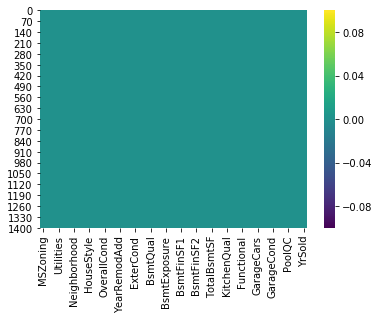

In [13]:
sns.heatmap(X_cleaned.isnull(), cmap='viridis')

In [14]:
X_cleaned.shape

(1460, 35)

### Handling Missing Data on Test Dataset

In [15]:
Y = test_data.drop(labels = ['Id','MSSubClass', 'LotFrontage', 'LotArea', 'Alley', 'LotShape', 'LandContour',
                                           'LotConfig', 'Condition1', 'Condition2', 'RoofStyle' ,'RoofMatl', 'Exterior1st',
                                           'Exterior2nd', 'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 
                                           'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                                           'BedroomAbvGr', 'KitchenAbvGr','Fireplaces', 'FireplaceQu', 'GarageYrBlt',
                                           'GarageFinish', 'GarageArea','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                                           '3SsnPorch', 'ScreenPorch','PoolArea', 'Fence', 'MiscVal','SaleType',
                                           'SaleCondition', 'MasVnrType' , 'MasVnrArea' , 'MiscFeature' , 'Electrical'], axis = 1)

In [16]:
Y.head()

,MSZoning,Street,Utilities,LandSlope,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,TotRmsAbvGrd,Functional,GarageType,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,MoSold,YrSold
0,RH,Pave,AllPub,Gtl,NAmes,1Fam,1Story,5,6,1961,...,5,Typ,Attchd,1.0,TA,TA,Y,NaN,6,2010
1,RL,Pave,AllPub,Gtl,NAmes,1Fam,1Story,6,6,1958,...,6,Typ,Attchd,1.0,TA,TA,Y,NaN,6,2010
2,RL,Pave,AllPub,Gtl,Gilbert,1Fam,2Story,5,5,1997,...,6,Typ,Attchd,2.0,TA,TA,Y,NaN,3,2010
3,RL,Pave,AllPub,Gtl,Gilbert,1Fam,2Story,6,6,1998,...,7,Typ,Attchd,2.0,TA,TA,Y,NaN,6,2010
4,RL,Pave,AllPub,Gtl,StoneBr,TwnhsE,1Story,8,5,1992,...,5,Typ,Attchd,2.0,TA,TA,Y,NaN,1,2010


In [17]:
Y[Y.columns[Y.isnull().any()]].isnull().sum()

MSZoning           4
Utilities          2
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
KitchenQual        1
Functional         2
GarageType        76
GarageCars         1
GarageQual        78
GarageCond        78
PoolQC          1456
dtype: int64

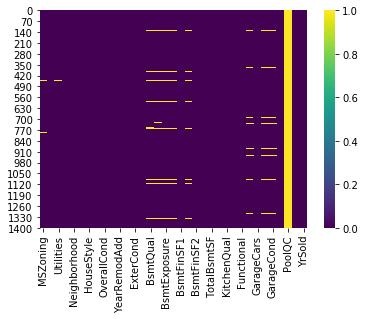

In [18]:
sns.heatmap(Y.isnull(), cmap='viridis')

In [19]:
Y['MSZoning'].fillna(value = Y['MSZoning'].mode()[0], inplace=True)
Y['Utilities'].fillna(value = Y['Utilities'].mode()[0], inplace=True)
Y['BsmtQual'].fillna(value = 'Not Available', inplace=True)
Y['BsmtCond'].fillna(value = 'Not Available', inplace=True)
Y['BsmtExposure'].fillna(value = 'Not Available', inplace=True)
Y['BsmtFinType1'].fillna(value = 'Not Available', inplace=True)
Y['BsmtFinSF1'].fillna(value = Y['BsmtFinSF1'].mean(), inplace=True)
Y['BsmtFinType2'].fillna(value = 'Not Available', inplace=True)
Y['BsmtFinSF2'].fillna(value = Y['BsmtFinSF2'].mean(), inplace=True)
Y['BsmtUnfSF'].fillna(value = Y['BsmtUnfSF'].mean(), inplace=True)
Y['TotalBsmtSF'].fillna(value = Y['TotalBsmtSF'].mean(), inplace=True)
Y['KitchenQual'].fillna(value = Y['KitchenQual'].mode()[0], inplace=True)
Y['Functional'].fillna(value = Y['Functional'].mode()[0], inplace=True)
Y['GarageType'].fillna(value = 'Not Available', inplace=True)
Y['GarageCars'].fillna(value = Y['GarageCars'].mean(), inplace=True)
Y['GarageQual'].fillna(value = 'Not Available', inplace=True)
Y['GarageCond'].fillna(value = 'Not Available', inplace=True)
Y['PoolQC'].fillna(value = 'Not Available', inplace=True)

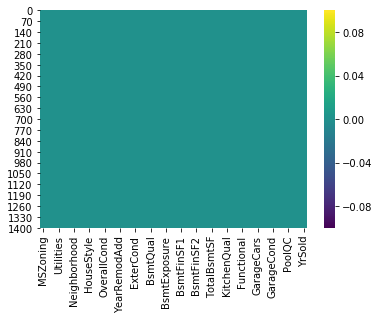

In [20]:
sns.heatmap(Y.isnull(), cmap='viridis')

In [21]:
Y[Y.columns[Y.isnull().any()]].isnull().sum()

Series([], dtype: float64)

In [22]:
Y.columns

Index(['MSZoning', 'Street', 'Utilities', 'LandSlope', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'GarageType', 'GarageCars',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'MoSold', 'YrSold'],
      dtype='object')

In [23]:
#Concatenate both dataset row wise to create dummy variables
combined_df = pd.concat([X_cleaned, Y], axis=0)
combined_df.head()

,MSZoning,Street,Utilities,LandSlope,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,TotRmsAbvGrd,Functional,GarageType,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,MoSold,YrSold
0,RL,Pave,AllPub,Gtl,CollgCr,1Fam,2Story,7,5,2003,...,8,Typ,Attchd,2.0,TA,TA,Y,Not Available,2,2008
1,RL,Pave,AllPub,Gtl,Veenker,1Fam,1Story,6,8,1976,...,6,Typ,Attchd,2.0,TA,TA,Y,Not Available,5,2007
2,RL,Pave,AllPub,Gtl,CollgCr,1Fam,2Story,7,5,2001,...,6,Typ,Attchd,2.0,TA,TA,Y,Not Available,9,2008
3,RL,Pave,AllPub,Gtl,Crawfor,1Fam,2Story,7,5,1915,...,7,Typ,Detchd,3.0,TA,TA,Y,Not Available,2,2006
4,RL,Pave,AllPub,Gtl,NoRidge,1Fam,2Story,8,5,2000,...,9,Typ,Attchd,3.0,TA,TA,Y,Not Available,12,2008


In [24]:
combined_df.shape

(2919, 35)

In [25]:
combined_df = pd.get_dummies(combined_df, drop_first=True, columns=['MSZoning', 'Street', 'Utilities', 'LandSlope', 'Neighborhood',
                                                                'BldgType', 'HouseStyle', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
                                                                'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2',
                                                                'Functional','KitchenQual', 'GarageType', 'GarageQual',
                                                               'GarageCond', 'PavedDrive', 'PoolQC'])

In [26]:
combined_df.shape

(2919, 122)

In [27]:
#to check any duplicated columns are created
combined_df = combined_df.loc[:, ~combined_df.columns.duplicated()]

In [28]:
X_cleaned = combined_df.iloc[:1460,:]
Y_encoded = combined_df.iloc[1460:,:]

In [29]:
X_cleaned.shape

(1460, 122)

In [30]:
Y_encoded.shape

(1459, 122)

In [31]:
y_cleaned = y

In [32]:
y_cleaned

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

### Split data into Training and Dev set

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=.20, random_state = 0)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
Y_encoded = scaler.transform(Y_encoded)

In [35]:
X_train.shape[1]

122

# ANN

In [36]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [37]:
model = Sequential()
model.add(Dense(20, activation = 'relu', input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                2460      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               2688      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 9,309
Trainable params: 9,309
Non-trainable params: 0
____________________________________________________

In [39]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error', metrics = ['mean_squared_error'])

In [40]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [41]:
history = model.fit(x = X_train, y = y_train.to_numpy(), batch_size = 32, epochs = 250, validation_data=(X_test,y_test.to_numpy()), 
                   callbacks=[early_stop])


Train on 1168 samples, validate on 292 samples
Epoch 1/250
1168/1168 [==============================] - 1s 695us/step - loss: 38847677930.9589 - mean_squared_error: 38847680512.0000 - val_loss: 39797599638.7945 - val_mean_squared_error: 39797600256.0000
Epoch 2/250
1168/1168 [==============================] - 0s 94us/step - loss: 38836721523.7260 - mean_squared_error: 38836719616.0000 - val_loss: 39769285056.8767 - val_mean_squared_error: 39769288704.0000
Epoch 3/250
1168/1168 [==============================] - 0s 93us/step - loss: 38761126982.1370 - mean_squared_error: 38761119744.0000 - val_loss: 39603732928.8767 - val_mean_squared_error: 39603732480.0000
Epoch 4/250
1168/1168 [==============================] - 0s 97us/step - loss: 38411020989.3699 - mean_squared_error: 38411010048.0000 - val_loss: 38984396631.6712 - val_mean_squared_error: 38984396800.0000
Epoch 5/250
1168/1168 [==============================] - 0s 94us/step - loss: 37417997073.5342 - mean_squared_error: 3741800038

In [42]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
predictions = model.predict(X_test)

In [43]:
mean_absolute_error(y_test,predictions)

25378.91768782106

In [44]:
np.sqrt(mean_squared_error(y_test,predictions))

41725.86265563272

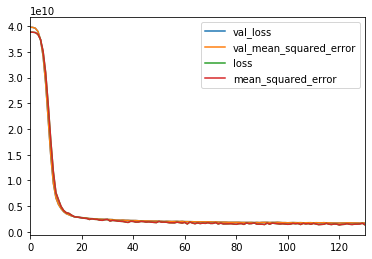

In [45]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [46]:
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=10)
results

Evaluate on test data
292/292 [==============================] - 0s 79us/step


[1741047612.2739725, 1741047808.0]

In [47]:
history.history.keys()

dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])

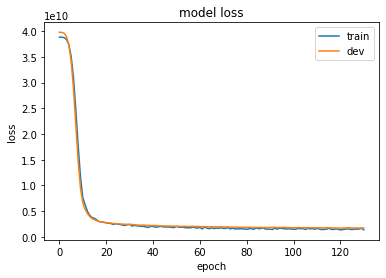

In [48]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='best')
plt.show()

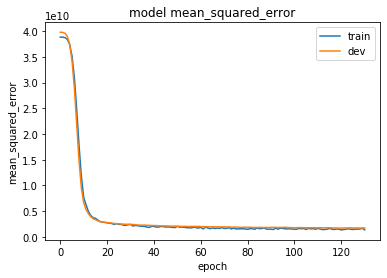

In [49]:
# summarize history for mean_squared_error
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='best')
plt.show()

# Predictions on given Test Set

In [50]:
Test_set_predictions = model.predict(Y_encoded)

In [52]:
type(Test_set_predictions)

numpy.ndarray

In [56]:
Test_set_predictions

array([[113596.9 ],
       [143734.81],
       [182629.12],
       ...,
       [188424.  ],
       [ 74683.84],
       [237472.05]], dtype=float32)

In [57]:
#Create Submission Dataframe
pred = pd.DataFrame(Test_set_predictions)
sub_df = pd.read_csv(r"E:\DEEP LEARNING\Projects\House Price Predictions\sample_submission.csv")
dataset_submit = pd.concat([sub_df['Id'], pred], axis = 1)

In [58]:
dataset_submit.columns = ['Id','SalePrice']
dataset_submit.to_csv('Submission_ANN.csv',index=False)